In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-notebook')

In [2]:
# read tracklet data.
tracks = np.load('sample_data/_ssd_Cohorts_CNMC_9036_rois_903614_roi_0_npy.npy')

In [3]:
# end_frame only contains the frame each tracklet ends on. Expand it to contain
# the frame number for each point.
n_tracks, n_pts, _ = tracks['coords'].shape
ts = np.mgrid[:n_tracks, :n_pts][1] - n_pts + tracks['frame_num'][:, None] + 1

In [4]:
import sys
sys.path.append('/Users/maurice/PycharmProjects/updated_cilia')
from tracklet.tracklet import features as trackfeatures

vel = trackfeatures.velocity(tracks['coords'])
print(vel.shape)
vel_x = vel[:, :, 0]
vel_y = vel[:, :, 1]
mag = np.sqrt(vel_x**2 + vel_y**2)

(676, 11, 2)


In [5]:
x = []
y = []
for t in range(ts.max()):
    for m in mag[ts == t]:
        x.append(t)
        y.append(m)


<IPython.core.display.Javascript object>


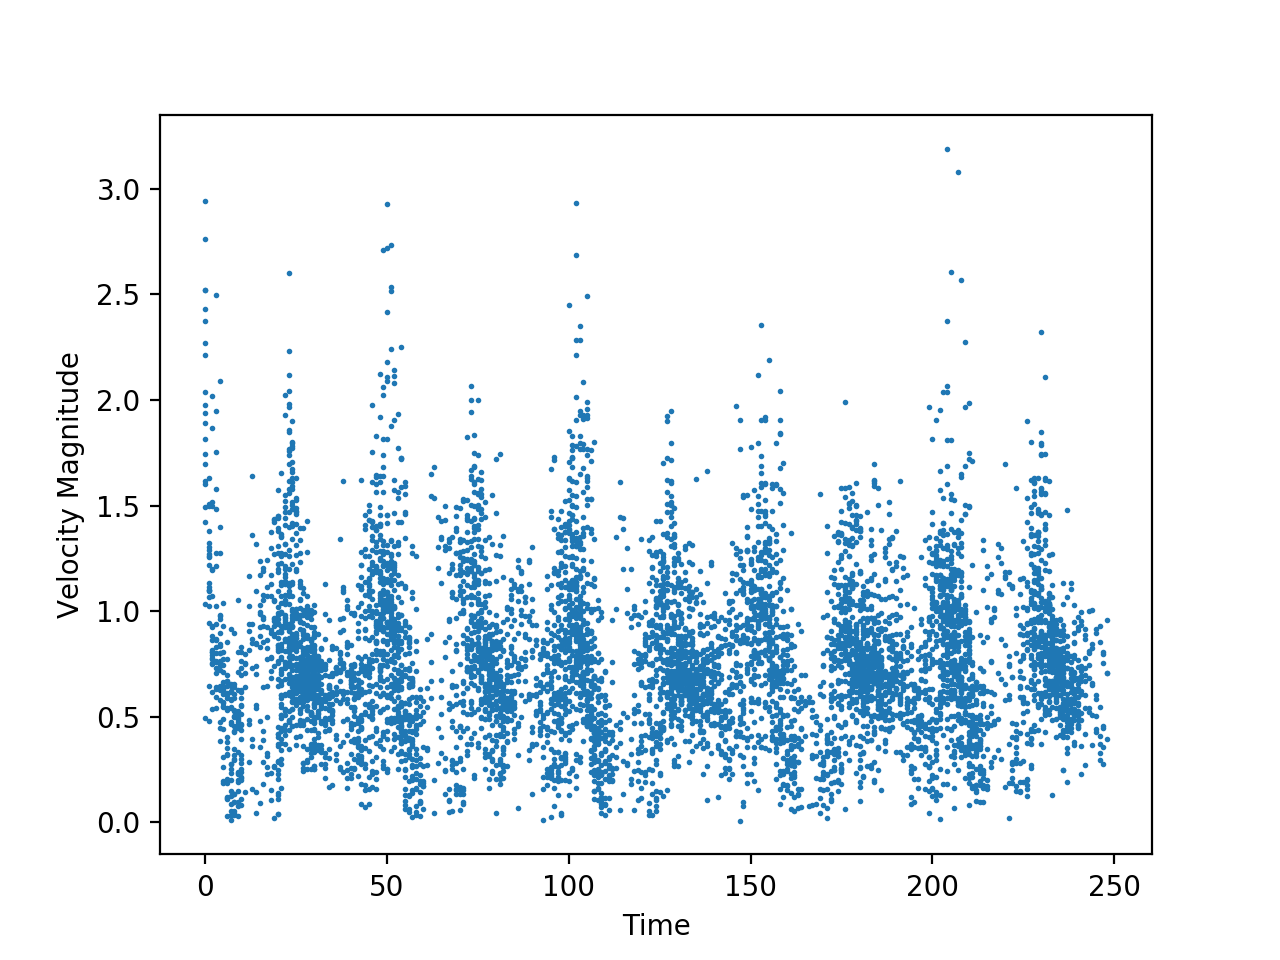

In [7]:
plt.plot(x, y, '.', ms=2.0)
plt.xlabel('Time')
plt.ylabel('Velocity Magnitude')
# plt.show()